<a href="https://colab.research.google.com/github/SolomonBekele/ml_telehakim/blob/main/multiple_desease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [140]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import os
import warnings

warnings.filterwarnings('ignore')

Data processing


In [141]:
df_train = pd.read_csv('/content/Training.csv')

In [102]:
# drop column if such have miss value
df_train.drop(columns='Unnamed: 133', inplace=True)

In [142]:
#number of row and column
df_train.shape

(4920, 134)

In [143]:
#the first five rows
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [144]:
# check these rows having missed value
df_train.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [145]:
#count number of each target values
df_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

# display the occurance
creates a horizontal bar plot using Seaborn's countplot() function to display the count of occurrences for each unique value in the 'prognosis' column of the DataFrame df_train.

*as we can see each 'prognosis' have 120 occurance *

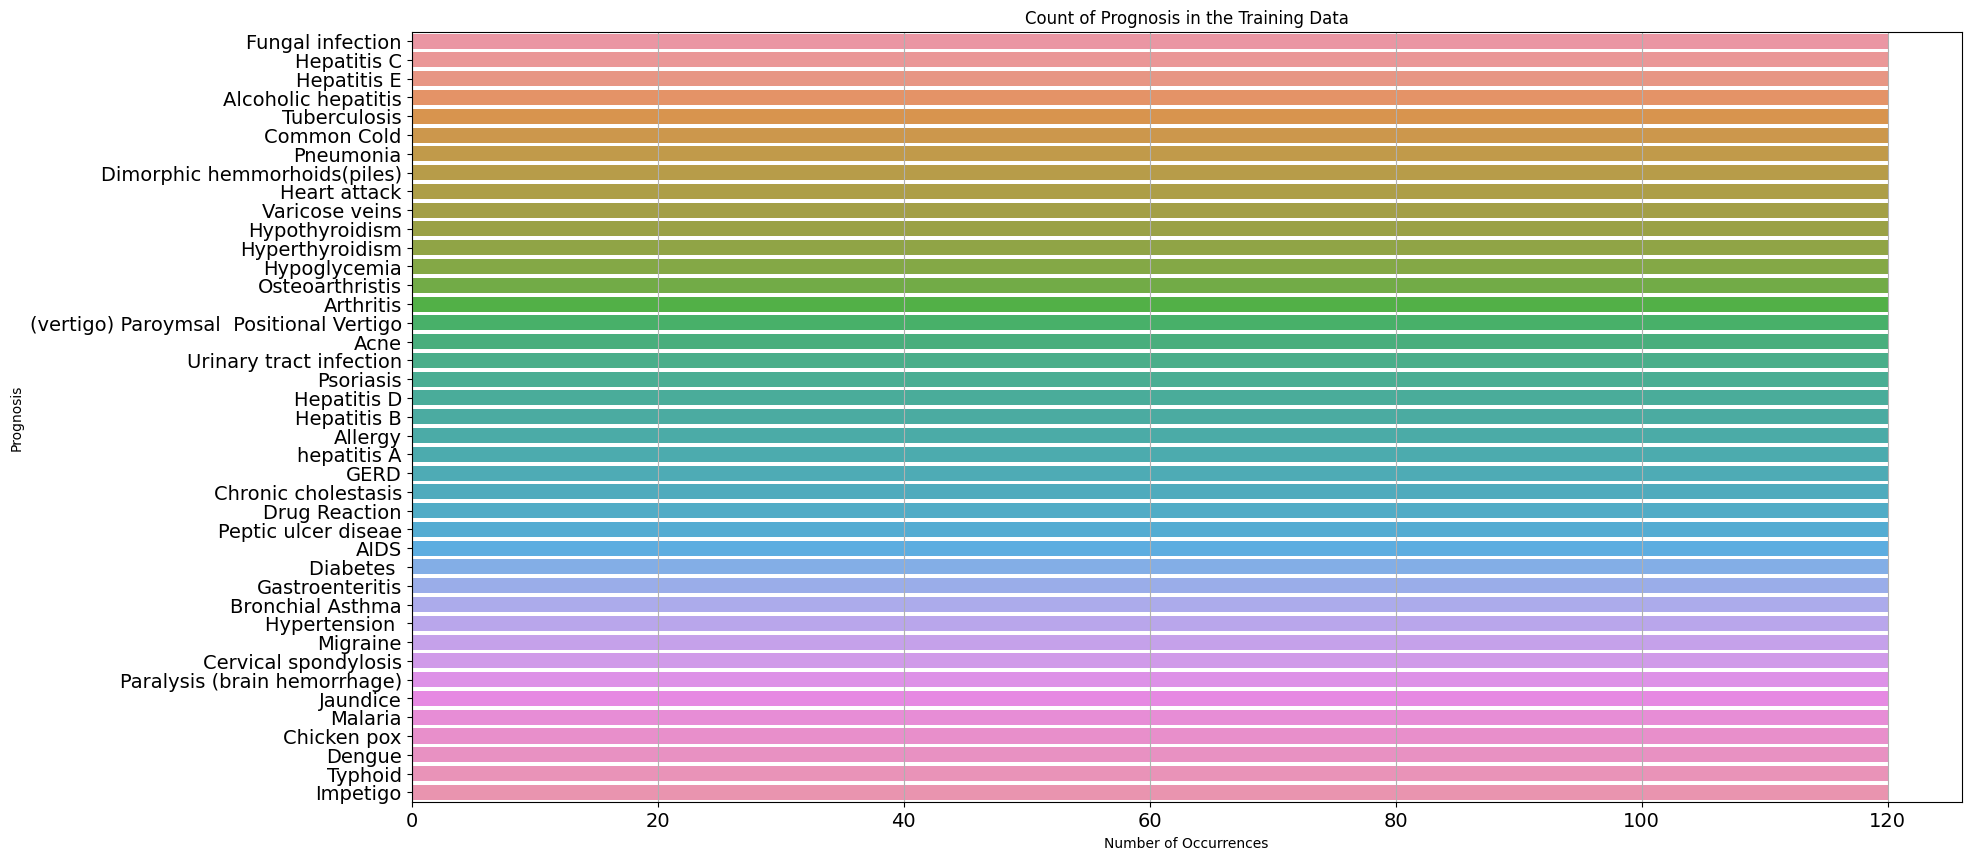

In [146]:
plt.figure(figsize=(20,10))
sns.countplot(y=df_train['prognosis'], order=df_train['prognosis'].value_counts().index)
plt.title('Count of Prognosis in the Training Data')
plt.xlabel('Number of Occurrences')
plt.ylabel('Prognosis')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x')
plt.show()

The **LabelEncoder** class converts categorical data into numeric labels. In this case, the fit_transform method of the LabelEncoder object le is applied to the "prognosis" column of the DataFrame. This method first fits the encoder to the unique values in the "prognosis" column and then transforms those values into numeric labels.



In [147]:
le = preprocessing.LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])

define the features(x) and output(y)

In [148]:

X = df_train.drop(columns=['prognosis'])
y = df_train['prognosis']

**Splitting data to train and test**

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle =True, stratify=y)

model train using xgboosting 

XGBoost is one of the most popular machine learning frameworks among data scientists. According to the Kaggle State of Data Science Survey 2021, almost 50% of respondents said they used XGBoost, ranking below only TensorFlow and Sklearn. 

In [111]:
from xgboost import XGBClassifier

XGBClassifierModel = XGBClassifier(verbose=50,n_estimators=300, random_state=0)
XGBClassifierModel.fit(X_train, y_train)

print('XGBClassifierModel Train Score is : ' , XGBClassifierModel.score(X_train, y_train))
print('XGBClassifierModel Test Score is : ' , XGBClassifierModel.score(X_test, y_test))

[11:49:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

XGBClassifierModel Train Score is :  1.0
XGBClassifierModel Test Score is :  1.0


find importance features

In [112]:
model_imp=XGBClassifierModel
imp_features = pd.DataFrame({
    "Feature":X.columns,
    "values" : model_imp.feature_importances_
}).sort_values(by='values',ascending = False)

main_feature=imp_features.head(24)['Feature'].tolist()
for i in range(1,6):
  print(main_feature[i*4:(i+1)*4]) # print out group of 4
imp_features.head(24)

['pain_during_bowel_movements', 'internal_itching', 'continuous_feel_of_urine', 'blister']
['skin_peeling', 'knee_pain', 'visual_disturbances', 'blackheads']
['weakness_in_limbs', 'movement_stiffness', 'altered_sensorium', 'dischromic _patches']
['irritability', 'ulcers_on_tongue', 'unsteadiness', 'muscle_wasting']
['spotting_ urination', 'dehydration', 'shivering', 'lack_of_concentration']


,Feature,values
100,belly_pain,0.164880
115,distention_of_abdomen,0.081394
66,bruising,0.081390
107,mucoid_sputum,0.081389
59,pain_during_bowel_movements,0.055037
93,internal_itching,0.040753
91,continuous_feel_of_urine,0.039757
129,blister,0.026856
125,skin_peeling,0.023035
78,knee_pain,0.020202


**train a model using importance features**

In [113]:
X = df_train.drop(columns=['prognosis'])[main_feature]
y = df_train['prognosis']
df_train.tail(30)[main_feature]

,belly_pain,distention_of_abdomen,bruising,mucoid_sputum,pain_during_bowel_movements,internal_itching,continuous_feel_of_urine,blister,skin_peeling,knee_pain,...,altered_sensorium,dischromic _patches,irritability,ulcers_on_tongue,unsteadiness,muscle_wasting,spotting_ urination,dehydration,shivering,lack_of_concentration
4890,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4892,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4897,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using catboost classifier

In [150]:
!pip install catboost -qq

In [151]:
from catboost import CatBoostClassifier


CatBoostClassifierModel = CatBoostClassifier(verbose=50, iterations=300, random_state=0)
CatBoostClassifierModel.fit(X_train, y_train)

print('CatBoostClassifierModel Train Score is : ' , CatBoostClassifierModel.score(X_train, y_train))
print('CatBoostClassifierModel Test Score is : ' , CatBoostClassifierModel.score(X_test, y_test))

Learning rate set to 0.234695
0:	learn: 2.4419408	total: 60.5ms	remaining: 18.1s
50:	learn: 0.0533691	total: 2.66s	remaining: 13s
100:	learn: 0.0183605	total: 6.32s	remaining: 12.5s
150:	learn: 0.0094687	total: 10.3s	remaining: 10.1s
200:	learn: 0.0063490	total: 14s	remaining: 6.92s
250:	learn: 0.0048323	total: 18.3s	remaining: 3.58s
299:	learn: 0.0039362	total: 21.7s	remaining: 0us
CatBoostClassifierModel Train Score is :  1.0
CatBoostClassifierModel Test Score is :  1.0


find out main_feature

In [152]:
model_imp=CatBoostClassifierModel
imp_features = pd.DataFrame({
    "Feature": X.columns,
    "values" : model_imp.feature_importances_
}).sort_values(by='values',ascending = False)

main_feature=imp_features.head(24)['Feature'].tolist()
for i in range(1,6):
  print(main_feature[i*4:(i+1)*4]) # print out group of 4
imp_features.head(24)

['headache', 'weight_loss', 'vomiting', 'breathlessness']
['fatigue', 'loss_of_balance', 'mood_swings', 'chest_pain']
['skin_rash', 'indigestion', 'malaise', 'continuous_feel_of_urine']
['prominent_veins_on_calf', 'itching', 'continuous_sneezing', 'pain_in_anal_region']
['dischromic _patches', 'sweating', 'palpitations', 'mild_fever']


,Feature,values
25,high_fever,13.386127
39,abdominal_pain,10.195188
6,joint_pain,9.201584
34,nausea,7.059147
31,headache,6.630624
19,weight_loss,5.748248
11,vomiting,4.594529
27,breathlessness,4.508991
14,fatigue,3.357762
85,loss_of_balance,3.243993


train amodel using main feature

In [153]:
X = df_train.drop(columns=['prognosis'])[main_feature]
y = df_train['prognosis']

split the new feature

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle =True, stratify=y)

In [155]:
from catboost import CatBoostClassifier


CatBoostClassifierModel = CatBoostClassifier(verbose=50, iterations=300, random_state=0)
CatBoostClassifierModel.fit(X_train, y_train)
print('CatBoostClassifierModel Train Score is : ' , CatBoostClassifierModel.score(X_train, y_train))
print('CatBoostClassifierModel Test Score is : ' , CatBoostClassifierModel.score(X_test, y_test))

Learning rate set to 0.234695
0:	learn: 2.7873911	total: 33.2ms	remaining: 9.93s
50:	learn: 0.1593377	total: 1.51s	remaining: 7.39s
100:	learn: 0.1401308	total: 2.97s	remaining: 5.85s
150:	learn: 0.1355998	total: 5.37s	remaining: 5.3s
200:	learn: 0.1337249	total: 6.82s	remaining: 3.36s
250:	learn: 0.1325688	total: 8.26s	remaining: 1.61s
299:	learn: 0.1318804	total: 9.68s	remaining: 0us
CatBoostClassifierModel Train Score is :  0.963160569105691
CatBoostClassifierModel Test Score is :  0.9583333333333334


**reverse lable encoding**

and map with its name


In [156]:
cla = le.classes_

mapper = dict(zip(range(len(cla)), cla))
mapper

{0: '(vertigo) Paroymsal  Positional Vertigo',
 1: 'AIDS',
 2: 'Acne',
 3: 'Alcoholic hepatitis',
 4: 'Allergy',
 5: 'Arthritis',
 6: 'Bronchial Asthma',
 7: 'Cervical spondylosis',
 8: 'Chicken pox',
 9: 'Chronic cholestasis',
 10: 'Common Cold',
 11: 'Dengue',
 12: 'Diabetes ',
 13: 'Dimorphic hemmorhoids(piles)',
 14: 'Drug Reaction',
 15: 'Fungal infection',
 16: 'GERD',
 17: 'Gastroenteritis',
 18: 'Heart attack',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 23: 'Hypertension ',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 26: 'Hypothyroidism',
 27: 'Impetigo',
 28: 'Jaundice',
 29: 'Malaria',
 30: 'Migraine',
 31: 'Osteoarthristis',
 32: 'Paralysis (brain hemorrhage)',
 33: 'Peptic ulcer diseae',
 34: 'Pneumonia',
 35: 'Psoriasis',
 36: 'Tuberculosis',
 37: 'Typhoid',
 38: 'Urinary tract infection',
 39: 'Varicose veins',
 40: 'hepatitis A'}

the ratio of the disease is appear in each row of datas of X_test 

In [157]:
test_df = pd.DataFrame(CatBoostClassifierModel.predict_proba(X_test), columns=mapper.values())
test_df

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0.000082,0.000529,0.000284,0.000044,0.000955,1.690504e-03,0.000018,0.030125,0.000012,0.000010,...,0.000563,0.000132,0.000032,0.000039,0.000008,0.000016,0.000011,0.000793,0.000143,0.000012
1,0.000002,0.000040,0.000364,0.000006,0.000037,8.017255e-05,0.000008,0.000031,0.000006,0.000005,...,0.000048,0.000003,0.000004,0.000002,0.000167,0.000002,0.000002,0.000033,0.000008,0.000004
2,0.000009,0.000706,0.000791,0.000024,0.001527,6.250472e-03,0.000012,0.000912,0.000003,0.000002,...,0.000835,0.000024,0.000010,0.000004,0.000012,0.000002,0.000002,0.001162,0.000089,0.000004
3,0.000007,0.000025,0.000030,0.000012,0.000072,6.860380e-05,0.000551,0.000039,0.000008,0.000006,...,0.000040,0.000015,0.000010,0.000080,0.000009,0.000012,0.000007,0.000039,0.002070,0.000005
4,0.000004,0.000130,0.000101,0.000006,0.000081,2.175828e-04,0.000017,0.000097,0.000002,0.000003,...,0.947372,0.000007,0.000005,0.000003,0.051395,0.000002,0.000002,0.000074,0.000012,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.000194,0.024930,0.024882,0.000719,0.074071,6.411188e-01,0.000275,0.034786,0.000037,0.000050,...,0.031558,0.000710,0.000260,0.000059,0.000340,0.000033,0.000024,0.038771,0.002303,0.000070
980,0.000016,0.000758,0.000809,0.000035,0.983855,7.443050e-03,0.000020,0.000965,0.000005,0.000004,...,0.000905,0.000039,0.000012,0.000008,0.000014,0.000005,0.000004,0.001071,0.000140,0.000006
981,0.000001,0.000002,0.000002,0.000005,0.000002,9.277591e-07,0.000007,0.000001,0.000010,0.000026,...,0.000002,0.000001,0.000002,0.000002,0.000003,0.000002,0.000007,0.000002,0.000017,0.000002
982,0.000005,0.000133,0.791964,0.000019,0.000138,2.318973e-04,0.000031,0.000116,0.000008,0.000010,...,0.000158,0.000008,0.000010,0.000007,0.033973,0.000005,0.000005,0.000128,0.000029,0.000013


In [ ]:
k=

print out the real and the top 3 diseases that appear in each row(input features)

In [160]:
cols = list(mapper.values())
y_mod = y_test.apply(lambda x:mapper.get(x)).reset_index(drop=True)

for ii in range(20,test_df.shape[0]):
  tes_i = test_df.loc[ii]
  top_3 = sorted([(i, cols[j]) for j, i in enumerate(tes_i.values)],reverse=True)[:3]
  top_3 = [(i, round(j*100, 3)) for j, i in top_3]
  real_pred = y_mod.loc[ii]
  print(real_pred, top_3)

  if ii == 30:
    break

Hepatitis D [('Hepatitis D', 93.576), ('Hepatitis E', 6.39), ('Typhoid', 0.009)]
AIDS [('AIDS', 94.503), ('Impetigo', 5.015), ('Bronchial Asthma', 0.31)]
Dimorphic hemmorhoids(piles) [('Dimorphic hemmorhoids(piles)', 98.59), ('Arthritis', 0.625), ('Allergy', 0.153)]
AIDS [('AIDS', 94.503), ('Impetigo', 5.015), ('Bronchial Asthma', 0.31)]
Tuberculosis [('Tuberculosis', 99.994), ('Pneumonia', 0.003), ('Bronchial Asthma', 0.0)]
Peptic ulcer diseae [('Peptic ulcer diseae', 97.53), ('Alcoholic hepatitis', 1.491), ('Arthritis', 0.209)]
Common Cold [('Common Cold', 98.857), ('AIDS', 0.364), ('Bronchial Asthma', 0.094)]
Typhoid [('Typhoid', 99.959), ('Hepatitis E', 0.03), ('Dengue', 0.002)]
Hepatitis E [('Hepatitis E', 99.986), ('Hepatitis D', 0.006), ('Typhoid', 0.005)]
Hepatitis C [('Hepatitis C', 99.921), ('Varicose veins', 0.023), ('Diabetes ', 0.02)]
Jaundice [('Jaundice', 99.997), ('Hepatitis E', 0.0), ('Bronchial Asthma', 0.0)]
